# Predict Salary

## Importing the Python libraries

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

import os

import math

%matplotlib inline

## Dataset
### Set raw data file path
### Reading the data sheet

In [36]:
raw_file_path = os.path.join(os.path.pardir, 'data', 'raw')
raw_data_file_path = os.path.join(raw_file_path, 'SalaryData.xlsx')

raw_data = pd.read_excel(raw_data_file_path)

## Explore Data
### Get a sneak peak

In [37]:
raw_data.head(10)

,Timestamp,Experience,Generic Job Title,Gender,Salary
0,2020-05-06 12:14:29.670,3.0,Quality control analyst,Female,500000
1,2020-05-06 12:38:16.941,3.0,Software Quality assurance Analyst,Female,600000
2,2020-05-06 12:44:20.838,7.0,Key Account Manager,Male,871000
3,2020-05-06 12:46:53.059,0.3,Software Engineer,Female,200000
4,2020-05-06 12:48:01.324,5.0,Software Engineer,Male,800000
5,2020-05-06 12:50:51.172,4.0,Electrical engineer,Female,900000
6,2020-05-06 12:50:51.931,3.0,Engineer,Female,540000
7,2020-05-06 13:06:39.201,7.0,Software consultant,Male,1030000
8,2020-05-06 13:12:09.161,5.5,Software engineer,Female,580000
9,2020-05-06 13:12:54.546,1.0,Designer,Female,300000


In [38]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
Timestamp            40 non-null datetime64[ns]
Experience           40 non-null float64
Generic Job Title    40 non-null object
Gender               40 non-null object
Salary               40 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.6+ KB


## Cleaning and Processing data
### Dropping a redundant column

In [39]:
raw_data.drop(['Timestamp'], axis = 1, inplace=True)
raw_data.head()

,Experience,Generic Job Title,Gender,Salary
0,3.0,Quality control analyst,Female,500000
1,3.0,Software Quality assurance Analyst,Female,600000
2,7.0,Key Account Manager,Male,871000
3,0.3,Software Engineer,Female,200000
4,5.0,Software Engineer,Male,800000


### Generalising the job titles into categories

In [40]:
def GetJobTitle(jobtitle):
    engineer = ["engineer", "analyst","data scientist", "quality","admin", "control", "software","consultant", "designer", "developer"]
    account = ["account"]
    title = jobtitle
    title = title.strip().lower()
    for i in range(len(engineer)):
        if (engineer[i] in title):
             title = "Engineer"
    for i in range(len(account)):
        if (account[i] in title):
            title = "Accountant"
    
    return title

### Creating a new column 'Job Title'

In [41]:
raw_data['Job Title'] = raw_data['Generic Job Title'].map(lambda x : GetJobTitle(x))

In [42]:
raw_data['Job Title']

0       Engineer
1       Engineer
2     Accountant
3       Engineer
4       Engineer
5       Engineer
6       Engineer
7       Engineer
8       Engineer
9       Engineer
10      Engineer
11      Engineer
12      Engineer
13      Engineer
14      Engineer
15      Engineer
16      Engineer
17      Engineer
18      Engineer
19      Engineer
20      Engineer
21      Engineer
22      Engineer
23      Engineer
24      Engineer
25      Engineer
26      Engineer
27      Engineer
28      Engineer
29      Engineer
30      Engineer
31      Engineer
32      Engineer
33      Engineer
34    Accountant
35      Engineer
36      Engineer
37      Engineer
38    Accountant
39      Engineer
Name: Job Title, dtype: object

### Dropping a redundant column

In [43]:
raw_data.drop(['Generic Job Title'], axis = 1, inplace=True)
raw_data.head()

,Experience,Gender,Salary,Job Title
0,3.0,Female,500000,Engineer
1,3.0,Female,600000,Engineer
2,7.0,Male,871000,Accountant
3,0.3,Female,200000,Engineer
4,5.0,Male,800000,Engineer


###  Removing precision from the values of  experience that are in fractions

In [44]:
raw_data['Experience'] = round(raw_data['Experience'])


In [45]:
raw_data

,Experience,Gender,Salary,Job Title
0,3.0,Female,500000,Engineer
1,3.0,Female,600000,Engineer
2,7.0,Male,871000,Accountant
3,0.0,Female,200000,Engineer
4,5.0,Male,800000,Engineer
5,4.0,Female,900000,Engineer
6,3.0,Female,540000,Engineer
7,7.0,Male,1030000,Engineer
8,6.0,Female,580000,Engineer
9,1.0,Female,300000,Engineer


In [46]:
### Label Encoding to tranform Gender and Job Title categorical data into numerics

In [47]:
raw_data['Gender Encoded'] = LabelEncoder().fit_transform(raw_data['Gender'])
raw_data['Job Title Encoded'] = LabelEncoder().fit_transform(raw_data['Job Title'])

In [48]:
raw_data

,Experience,Gender,Salary,Job Title,Gender Encoded,Job Title Encoded
0,3.0,Female,500000,Engineer,0,1
1,3.0,Female,600000,Engineer,0,1
2,7.0,Male,871000,Accountant,1,0
3,0.0,Female,200000,Engineer,0,1
4,5.0,Male,800000,Engineer,1,1
5,4.0,Female,900000,Engineer,0,1
6,3.0,Female,540000,Engineer,0,1
7,7.0,Male,1030000,Engineer,1,1
8,6.0,Female,580000,Engineer,0,1
9,1.0,Female,300000,Engineer,0,1


### Re-arrange the columns in a correct sequence (x, y)

In [49]:
raw_data = raw_data[['Experience', 'Gender', 'Gender Encoded', 'Job Title', 'Job Title Encoded', 'Salary']]
raw_data

,Experience,Gender,Gender Encoded,Job Title,Job Title Encoded,Salary
0,3.0,Female,0,Engineer,1,500000
1,3.0,Female,0,Engineer,1,600000
2,7.0,Male,1,Accountant,0,871000
3,0.0,Female,0,Engineer,1,200000
4,5.0,Male,1,Engineer,1,800000
5,4.0,Female,0,Engineer,1,900000
6,3.0,Female,0,Engineer,1,540000
7,7.0,Male,1,Engineer,1,1030000
8,6.0,Female,0,Engineer,1,580000
9,1.0,Female,0,Engineer,1,300000


### Data Analysis and Visualization

In [50]:
raw_data.groupby(['Job Title'])['Salary'].median()

Job Title
Accountant    850000
Engineer      850000
Name: Salary, dtype: int64

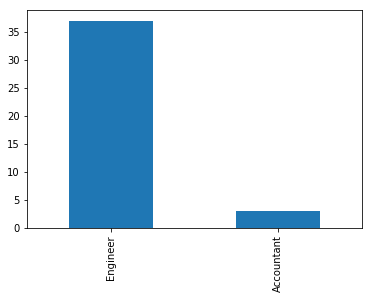

In [51]:
raw_data['Job Title'].value_counts().plot(kind = 'bar')

In [52]:
raw_data[['Job Title', 'Gender']]
raw_data.Gender.value_counts(normalize = True)

Male      0.525
Female    0.475
Name: Gender, dtype: float64

In [53]:
raw_data.groupby(['Gender'])['Experience', 'Salary'].median()

,Experience,Salary
Gender,,
Female,5.0,789180
Male,6.0,920000


In [56]:
raw_data.groupby(['Gender'])['Salary'].mean()

Gender
Female    751708.736842
Male      971718.238095
Name: Salary, dtype: float64

In [57]:
raw_data.groupby(['Experience','Gender', 'Job Title'])['Salary'].median()

Experience  Gender  Job Title 
0.0         Female  Engineer       200000.0
1.0         Female  Engineer       300000.0
2.0         Male    Engineer       600000.0
3.0         Female  Engineer       540000.0
4.0         Female  Engineer       840000.0
            Male    Engineer       700000.0
5.0         Female  Engineer       794590.0
            Male    Engineer       800000.0
6.0         Female  Engineer       900000.0
            Male    Accountant     805000.0
                    Engineer       885000.0
7.0         Female  Engineer       815000.0
            Male    Accountant     871000.0
                    Engineer      1000000.0
8.0         Female  Engineer      1071643.0
            Male    Engineer      1600000.0
9.0         Female  Engineer      1050000.0
            Male    Engineer      1100000.0
10.0        Male    Engineer      1222791.5
11.0        Male    Engineer      1200000.0
12.0        Female  Engineer      1300000.0
            Male    Engineer      1400000.0
N

### Getting the mean of salaries based on each years of experience

In [34]:
dict = (raw_data.groupby(['Experience'])['Salary'].mean().astype(int)).to_dict()
print(dict)

KeyError: "Columns not found: 'Gender'"

In [22]:
for k, v in dict.items():
    raw_data.loc[raw_data.Experience == k, "Salary"] = v
    
raw_data

,Experience,Gender,Gender Encoded,Job Title,Job Title Encoded,Salary
0,3.0,Female,0,Engineer,1,546666
1,3.0,Female,0,Engineer,1,546666
2,7.0,Male,1,Accountant,0,921750
3,0.0,Female,0,Engineer,1,200000
4,5.0,Male,1,Engineer,1,787836
5,4.0,Female,0,Engineer,1,793333
6,3.0,Female,0,Engineer,1,546666
7,7.0,Male,1,Engineer,1,921750
8,6.0,Female,0,Engineer,1,840000
9,1.0,Female,0,Engineer,1,300000


### Removing Gender and Job Title column

In [23]:
raw_data.drop(['Gender'], axis = 1, inplace=True)
raw_data.drop(['Job Title'], axis = 1, inplace=True)
raw_data.head()

,Experience,Gender Encoded,Job Title Encoded,Salary
0,3.0,0,1,546666
1,3.0,0,1,546666
2,7.0,1,0,921750
3,0.0,0,1,200000
4,5.0,1,1,787836


### Processed data path

In [24]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_processed_data_path = os.path.join(processed_data_path, 'processed_data.xlsx')
raw_data.to_excel(write_processed_data_path, index=False)

### Read processed data to feed into the model

In [25]:
processed_data = pd.read_excel(write_processed_data_path)

In [26]:
processed_data

,Experience,Gender Encoded,Job Title Encoded,Salary
0,3,0,1,546666
1,3,0,1,546666
2,7,1,0,921750
3,0,0,1,200000
4,5,1,1,787836
5,4,0,1,793333
6,3,0,1,546666
7,7,1,1,921750
8,6,0,1,840000
9,1,0,1,300000


### Splitting the whole data into training and testing batches using train_test_split

In [27]:
train, test = train_test_split(processed_data, test_size = 0.2)
print("Training size: {}, Test Size {}".format(len(train), len(test)))

Training size: 32, Test Size 8


### Defining train and test data X and y features

In [28]:
features = ['Experience', 'Gender Encoded', 'Job Title Encoded']
X_train = train[features]
y_train = train['Salary']

X_test = test[features]
y_test = test['Salary'] 

### Creating the model

In [29]:
clf = RandomForestRegressor(n_estimators=100, random_state=0)

### Training the model using fit()

In [30]:
clf = clf.fit(X_train, y_train)

### Predict based on a new set of input variables

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print(y_pred)
print(X_test)
print(y_test)

[1173882.64  921750.    839478.36  839478.36  788522.55 1295211.67
  748823.    839478.36]
    Experience  Gender Encoded  Job Title Encoded
11           8               1                  1
21           7               1                  1
32           6               0                  1
39           6               1                  1
4            5               1                  1
30          12               0                  1
15           4               0                  1
19           6               1                  1
11    1247762
21     921750
32     840000
39     840000
4      787836
30    1350000
15     793333
19     840000
Name: Salary, dtype: int64


### Model Metrics: Errors

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 21928.645000000033
Mean Squared Error: 1305293589.2462277
Root Mean Squared Error: 36128.847051161596
